In [2]:
using Revise
import NMR
import Plots

HMDB initialised from /home/mu3q/Source/NMR.jl/src
Module NMR v0.9.0
(c)mu 2018-2025


### Old-Style data loading

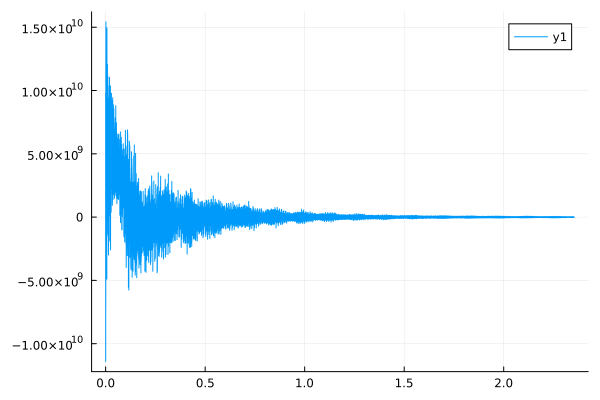

In [2]:
f=NMR.readBrukerFID("./test/data/10/fid")
acqus=NMR.readBrukerParameterFile("./test/data/10/acqus")
dwellTime=1/acqus["SW_h"]
f=f[acqus["GRPDLY"]:end]

d=NMR.Data1D(f,0.0,length(f)*dwellTime)
Plots.plot(real(d))

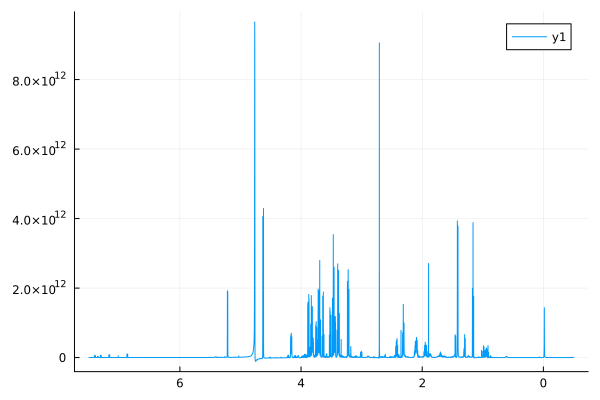

In [3]:
spect=NMR.FourierTransform(d,PPM=acqus["SFO1"],CTR=4.76,SI=65536) |> x->NMR.PhaseCorrect(x,Ph0=0,Ph1=0) |> NMR.AutoPhaseCorrectChen  |> x->NMR.cut(x,-0.5,7.5)
Plots.plot(spect,xaxis=:flip)

### New data structure

with the new `DataSet` structure, we can immediately do computations without any further cramps. Here is a calculation of the norm:

In [4]:
s=NMR.SpectData(f,(range(0.0,step=dwellTime,length=length(f)),))
sum(conj(s).*s)

7.199175337676633e22 + 0.0im

Plots work, too, even though we have not defined a plotting routine. It does not take into account the horizontal axis, though:

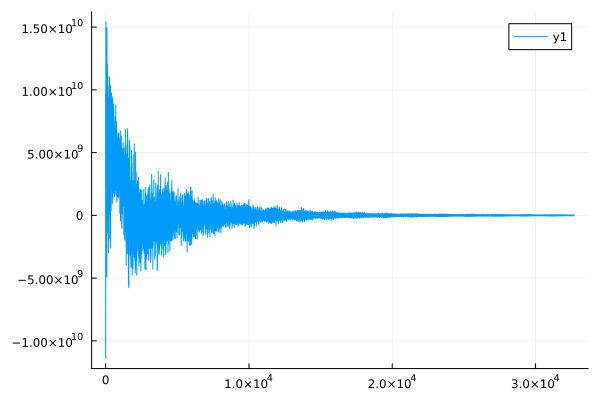

In [5]:
Plots.plot(real.(s))

However, we can obtain the coordinates in the same way that `axes()` works for arrays:

In [6]:
@show axes(s) ;
@show NMR.coords(s) ;

axes(s) = (Base.OneTo(32693),)
NMR.coords(s) = (0.0:7.199999999999995e-5:2.353823999999998,)


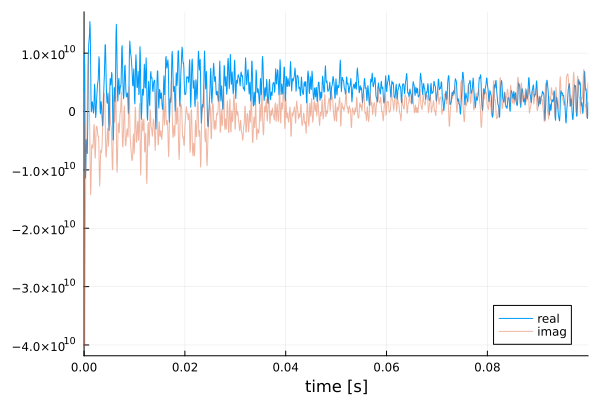

In [7]:
Plots.plot(NMR.coords(s),real.(s),xlabel="time [s]",label="real")
Plots.plot!(NMR.coords(s),imag.(s),xlabel="time [s]",label="imag",opacity=0.5,xlims=[0,0.1])

In [13]:
s[45]

7.590557489140625e8 - 1.1453282346578125e10im

In [9]:
IndexStyle(s)

IndexLinear()

In [12]:
s.dat[1] *= 0.5
s[1] *= 2.0

0.5 + 0.0im

In [20]:
NMR.SpectData(rand(Complex{BigFloat},10),(range(0,step=0.1,length=10),))

10-element NMR.SpectData{Complex{BigFloat}, 1}:
   0.2449852208209218140276922199610418146444582062167474151534136692853543681072889 + 0.04729878315156147261380916378701855343208812317329221751464456769325851469666134im
   0.2881002446182400197165140663747101428556565634161067046303243321199384634734757 + 0.6077721685036976943178620625901969666386482276588176810242205582642129043053414im
    0.568833339233761591279822868095697727914044860642732386365564774128809704425849 + 0.8994472514788777679129937561251709497208526363204266361245560436440695717932171im
   0.7429984521483502281718194826446236516924085307951009701886009540686837195871514 + 0.5518877610337117996283183628571093668340838793443266745014183485224652476555169im
   0.8994710253430962876197167953431918307901987802045970778031972164643090206426568 + 0.4090576880250236054693001529462033766567879598254521920135388805676729943037434im
   0.9332678547834080639718266526240125368455647740516152795865406157119558268809757 + 0.6689509

In [27]:
typeof(pi)

Irrational{:π}

In [26]:
convert(BigFloat,pi)

3.141592653589793238462643383279502884197169399375105820974944592307816406286198

In [1]:
import NMR
import NMR.Examples

HMDB initialised from /home/mu3q/Source/NMR.jl/src
Project NMR v0.10.0
No Matches in `~/Source/NMR.jl/Project.toml`


In [2]:
ex=Examples.Data["DMEM cell culture medium"]

s=open(ex["files"][2],"r")
header,param,data = NMR.readJEOL(s)
close(s)

In [61]:
param["X_SWEEP"]

(0, Tuple{String, String, Int8}[("", "Hertz", 1), ("", "None", 0), ("", "None", 0), ("", "None", 0), ("", "None", 0)], 11261.261261261263)

In [6]:
header["dataAxisType"]

8-element Vector{String}:
 "Complex"
 "None"
 "None"
 "None"
 "None"
 "None"
 "None"
 "None"

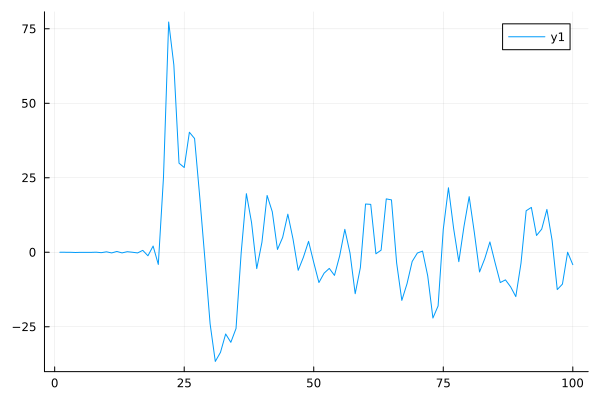

In [22]:
import Plots
Plots.plot(data[1:100])

In [19]:
for k in keys(param) println(k) end

wgh_grad_2_amp
sawtooth_range
wgh_x_pulse
phase_6
lowIndex
changer_slot_position
get_value_of_field
TOTAL_SCANS
spin_status
shim_x3z3
int_soft_pc
shim_yz2
comment_203
CLIPPED
X_PRESCANS
recvr_gain
inst_serial_number
xfreq
IRR_FREQ
TRI_OFFSET
get_atn
shim_track_axis3
phase_4
phase_acq
PROBE_RECOVERY
shim_track_axis1
last shimmed
X_SWEEP_CLIPPED
mas_ber_get
shim_x2
X_DOMAIN
job.allow printing
recvr_phase
sample.sample id
filename
shim_x4z2
shim_delay_state
shim_y2z
lock_level
job.total_time
temp_action
outer_buffer_loop
sample.proton_90
comment_201
solid_cap
DIGITAL_FILTER_STATUS
get_gamma
decimation_rate
shim_track_axis4_step
wgh_null_default
x_points_default
shim_xz5
stop_ripple
outer_buffer_loop_index
get_90
soft_pw_calc
shim_xz
X90
get_freq
irr_mode
iterations
comment_111
parameterSize
soft_bw_input
PROBE_DIALS
X_ACQ_DURATION
shim_track_axis1_step
he_level
lock_strength
spin_state
shim_z5
x_acq_time
TRI_DOMAIN
shim_y2z4
raw_pulse
temp_set
proton_90
comment_202
shim_yz3
raw_shape
X_PO

In [320]:
param["IRR_FREQ"]

(0, Tuple{String, String, Int8}[("", "Hertz", 1), ("", "None", 0), ("", "None", 0), ("", "None", 0), ("", "None", 0)], 6.0017230460376e8)

In [57]:
param["experiment"]

(0, Tuple{String, String, Int8}[("", "None", 0), ("", "None", 0), ("", "None", 0), ("", "None", 0), ("", "None", 0)], "wgh_perfect_echo")

In [65]:
for k in keys(header) println(k) end

listLength
baseFreq
author
annotateLength
contextLength
dataAxisStop
instrument
dataPoints
totalSize
annotationOk
dataType
historyLength
listStart
dataLength
comment
historyUsed
dataFormat
nodeName
paramStart
dataOffsetStart
site
dataAxisTitle
dataOffsetStop
reversed
contextStart
annotateStart
dataStart
endian
translate
major version
paramLength
dataAxisType
revisionTime
title
dimExist
minor version
creationTime
zeroPoint
dataAxisRanged
unitLocation
dims
dataUnits
dataAxisStart


In [321]:
header["zeroPoint"]

8-element Vector{Float64}:
 0.24877586399999996
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [269]:
header["dataFormat"]

"Two_D"

In [8]:
jfid=NMR.Data1D(data[21:23072]-im*data[23093:end],0.0,header["dataAxisStop"][1])

NMR.Data1D{Vector{ComplexF64}, Float64}(ComplexF64[25.125693656512905 + 74.94906828776224im, 77.28226410384362 + 75.5425547059966im, 62.87197004817374 - 15.71043704018364im, 29.896202257264267 - 21.305780676242854im, 28.440995950888734 - 10.797121605829615im, 40.278661483908785 - 9.221515412271675im, 38.173104671735494 - 26.279503963093667im, 18.540135286365675 - 40.83182270478401im, -2.4147618718477823 - 43.164170250347176im, -24.03910810905108 - 39.389862475537335im  …  -0.027951366735801 + 0.007737639313356835im, -0.01717098655362048 + 0.055659807360687055im, -0.011936027564839637 + 0.03347150681879842im, -0.0224055269439875 + 0.015872228853311385im, -0.003170431096216321 - 0.0021734704800795445im, 0.01212173831483689 - 0.03530901968036285im, -0.02989929446096321 + 0.00582029909435042im, 0.01577478821307946 - 0.003735974088233174im, 0.0 - 0.0im, 0.0 - 0.0im], 0.0, 2.0485271999999997)

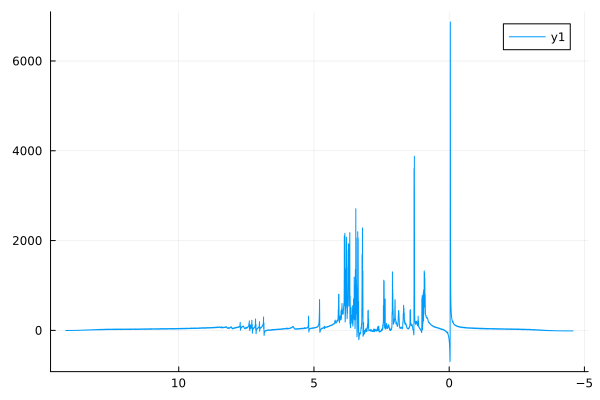

In [11]:
import Plots
jspect=NMR.FourierTransform(jfid,SI=2^16, LB=0.2pi, PPM=600,CTR=4.80)
jspect=NMR.AutoPhaseCorrectChen(jspect)
Plots.plot(jspect,xaxis=:flip)

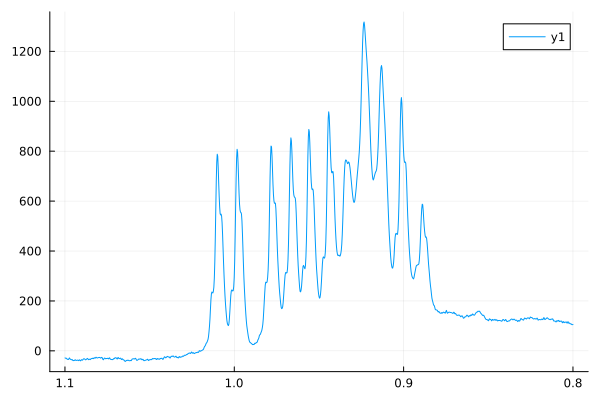

In [312]:
jspect=jspect-NMR.medianBaseline(jspect,wdw=2048)
Plots.plot(NMR.cut(jspect,0.8,1.1),xaxis=:flip)

In [306]:
header["dataPoints"]

8-element Vector{Int32}:
 23072
     1
     1
     1
     1
     1
     1
     1

In [246]:
#dmtrx=reshape(datafolded,32,32,-1)

23072/32

721.0

In [323]:
header["dataOffsetStop"]

8-element Vector{Int32}:
 23069
     0
     0
     0
     0
     0
     0
     0